In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Library import

In [2]:
##
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

##
from sklearn.metrics import confusion_matrix
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.preprocessing import image
import librosa

##
import timeit
import cv2
import glob
import pickle
from tqdm.auto import tqdm
import os
import random
import warnings
warnings.filterwarnings(action='ignore') 

## Data Load

In [19]:
raw_path = '/content/drive/MyDrive/Dacon/음향_데이터_covid-19_검출_AI_경진대회/data/raw'
extracted_path = '/content/drive/MyDrive/Dacon/음향_데이터_covid-19_검출_AI_경진대회/data/extracted'

In [36]:
audio_list_train = os.listdir(raw_path + '/train')
audio_path_train = raw_path + '/train/'

In [49]:
audio_list_train.sort()
# audio_list_train

---

## Spectrogram

In [40]:
s, sr = librosa.load( audio_tpath + audio_list_t[2], sr = 16000)
print(type(s) , type(sr))
print(s.shape, sr)

<class 'numpy.ndarray'> <class 'int'>
(152640,) 16000


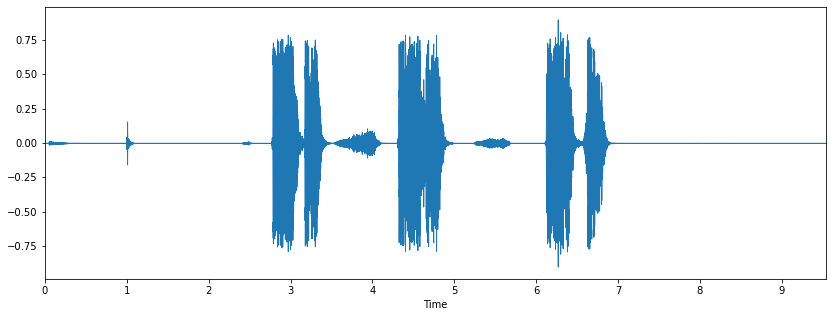

In [41]:
plt.figure(figsize=(14, 5))
librosa.display.waveplot(s, sr=sr)

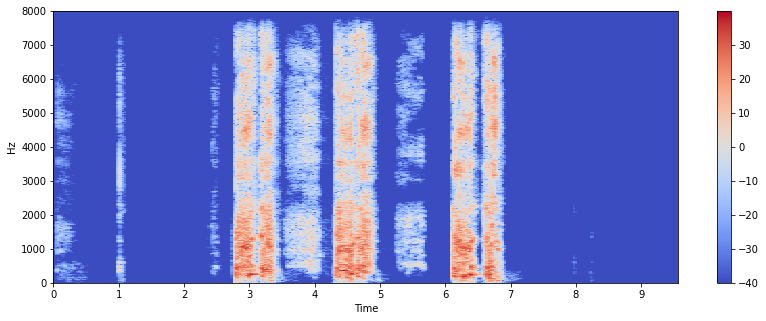

In [42]:
S = librosa.stft(s)
Sdb = librosa.amplitude_to_db(abs(S))
plt.figure(figsize = (14,5))
librosa.display.specshow(Sdb, sr = sr, x_axis = 'time' , y_axis = 'hz')
plt.colorbar()

In [46]:
path_train = raw_path + '/train/'
train_df = pd.read_csv( raw_path + '/train_data.csv')

train_df['file_name'] = audio_list_train
train_df

,id,age,gender,respiratory_condition,fever_or_muscle_pain,covid19,file_name
0,1,24,female,0,1,0,00001.wav
1,2,51,male,0,0,0,00002.wav
2,3,22,male,0,0,0,00003.wav
3,4,29,female,1,0,0,00004.wav
4,5,23,male,0,0,0,00005.wav
...,...,...,...,...,...,...,...
3800,3801,53,male,0,0,0,03801.wav
3801,3802,25,male,0,0,0,03802.wav
3802,3803,26,female,0,0,0,03803.wav
3803,3804,27,female,0,0,0,03804.wav


## Spectrogram to Img